# Лабораторная работа 1
Функция:

$$ f(x, \theta) = \theta _0 + \theta _2 x^2 $$

$$ \theta _i = 1 $$

### План эксперимента
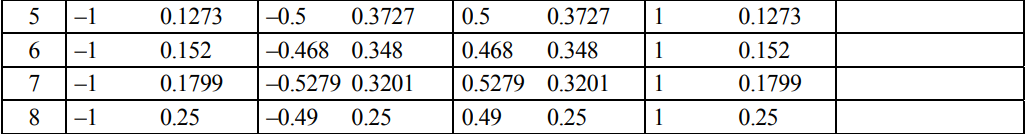

In [36]:
import pandas as pd
import numpy as np
import scipy.linalg as lng
import matplotlib.pyplot as plt

In [ ]:
def func(x):
    return np.array([1, x**2]).reshape(2, 1)

n = 4# количество спектров 
m = 2

data = [
    "-1 0.1273 -0.5 0.3727 0.5 0.3727 1 0.1273",
    "-1 0.152 -0.468 0.348 0.468 0.348 1 0.152",
    "-1 0.1799 -0.5279 0.3201 0.5279 0.3201 1 0.1799",
    "-1 0.25 -0.49 0.25 0.49 0.25 1 0.25",
]
data_list = []
for row in data:
    val = row.split()
    row_arr = []
    for i in range(0, 8, 2):
        row_arr.append([ float(val[i]), float(val[i+1]) ])
    data_list.append(row_arr)
df = pd.DataFrame(data_list)
df

,0,1,2,3
0,"[-1.0, 0.1273]","[-0.5, 0.3727]","[0.5, 0.3727]","[1.0, 0.1273]"
1,"[-1.0, 0.152]","[-0.468, 0.348]","[0.468, 0.348]","[1.0, 0.152]"
2,"[-1.0, 0.1799]","[-0.5279, 0.3201]","[0.5279, 0.3201]","[1.0, 0.1799]"
3,"[-1.0, 0.25]","[-0.49, 0.25]","[0.49, 0.25]","[1.0, 0.25]"


In [ ]:
for j in range(n):
    # Информационная матрица
    M = np.zeros((m, m))
    for i in range(n):
        M += df.at[j, i][1] * (func(df.at[j, i][0]) * np.transpose(func(df.at[j, i][0])))
    # Дисперсионная матрица
    D = lng.inv(M)

    det_D = lng.det(D)

    # Оценки
    # D-оптимальный план
    D_opt_plan = lng.det(M)

    # A-оптимальный план
    A_opt_plan = np.trace(D)

    # E-оптимальный план
    E_opt_plan = np.linalg.eigvals(M).min()

    # Фп-оптимальный план: введенные критерии Ф0, Ф1 и Ф2 -> p=2
    Fp_opt_plan = (np.matrix.trace(D @ D) / m)**0.5
    
    # Lambda-оптимальный план
    Lam_opt_plan = 0
    eig_aver = np.average(np.linalg.eigvals(D))
    for i in range(m):
        Lam_opt_plan += (np.linalg.eigvals(D)[i] - eig_aver)**2
    
    # MV-оптимальный план
    MV_opt_plan = np.diag(D).max()

    # G-оптимальный план
    d = list()
    for i in range(n):
        d.append(float(func(df.at[j, i][0]).T @ D @ func(df.at[j, i][0])))
    G_opt_plan = max(d)

        #M, "\n", D, "\n", 
    print("План номер ", j)
    print(D_opt_plan, "\n", A_opt_plan, "\n", E_opt_plan, "\n",
           Fp_opt_plan, "\n", Lam_opt_plan, "\n", MV_opt_plan, "\n", G_opt_plan, "\n")

[[1.        0.44095  ]
 [0.44095   0.3011875]]
[[1.         0.4564407 ]
 [0.4564407  0.33738817]]
[[1.         0.53820992]
 [0.53820992 0.40951899]]
[[1.         0.62005   ]
 [0.62005    0.52882401]]


C:\Users\katya\AppData\Local\Temp\ipykernel_17212\2271135866.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  d.append(float(func(df.at[j, i][0]).T @ D @ func(df.at[j, i][0])))


По поводу ранжирования и собственно выбора самого оптимального плана нашла вот что:
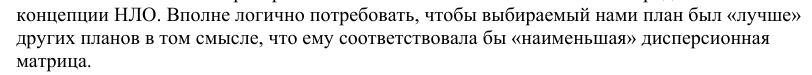

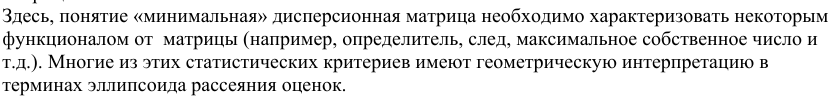

Но а вообще я выбрала оптимальный план где просто большее количество криетриев совпало

### Пункт 4

In [ ]:
x, p, q, res = [], [], [], []

for i in [i*0.01 for i in range(1,33)]:
    x = np.array([-1,-0.5,0.5,1])
    p = np.array([i, i, 1-3*i,i])
    q.append(i)

    M_q=np.zeros((m,m))
    for j in range(n):
        M_q+=p[j]*func(x[j]) @ np.transpose(func(x[j]))
    D_q = lng.inv(M_q)

    res.append(np.trace(D_q))
q_min = q[res.index(min(res))]


0.21
[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32]


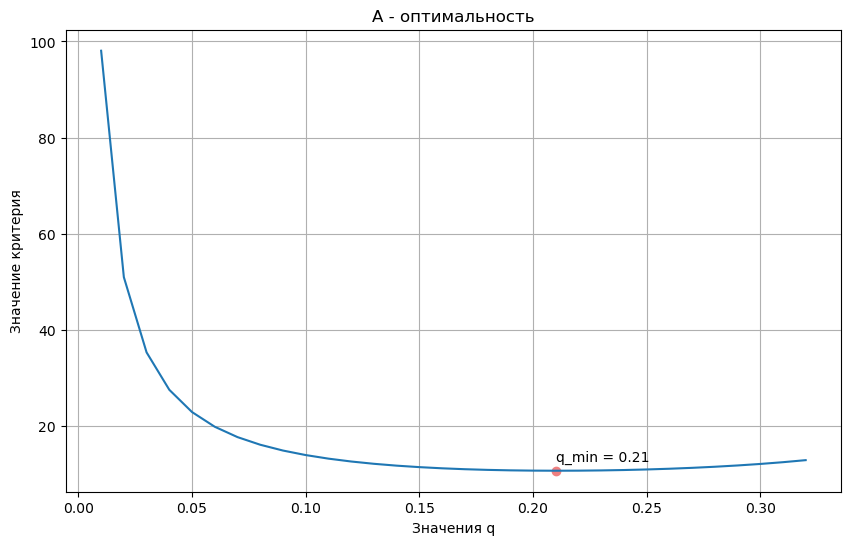

In [66]:
min_res = min(res)

fig = plt.figure(figsize=(10, 6))
plt.plot(q, res)
plt.scatter(q_min, min_res, color = 'lightcoral')
plt.title('А - оптимальность')
plt.ylabel('Значение критерия')
plt.xlabel('Значения q')
plt.grid(True)
plt.text(q_min, min_res+2,'q_min = 0.21')

plt.show()


In [64]:
print(f"Значение критерия: {min_res}, соответствующее значение q {q_min}")

Значение критерия: 10.627622696588212, соответствующее значение q 0.21
